<a href="https://colab.research.google.com/github/LifeLiveOn/Pytorch-jupiterNb/blob/main/SGDAndTrainValData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Stochastic Gradient Descent is an optimization algorithm used in machine learning to minimize the loss function. Key points:
Iterative: Updates model parameters in steps.
Stochastic: Uses random subsets of data in each iteration.
Efficient: Faster than full gradient descent, especially for large datasets.
Process:
Randomly select a small batch or single data point
Calculate gradient of loss function
Update parameters in direction of negative gradient
Learning rate: Controls step size of updates.
Advantages: Fast, can escape local minima, works well with large datasets.
Challenges: Noisy updates, requires tuning.
SGD is widely used in training neural networks and other machine learning models due to its efficiency and effectiveness with large-scale data.
```



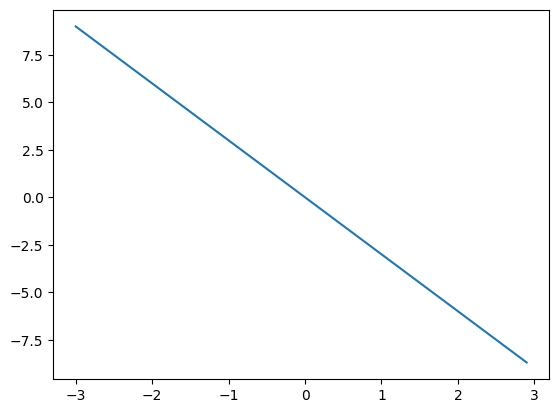

In [ ]:
import torch
w = torch.tensor(-15.0,requires_grad=True)
b=torch.tensor(-10.0,requires_grad=True)

X = torch.arange(-3,3,0.1).view(-1,1)
f=-3*X
import matplotlib.pylab as plt
plt.plot(X.numpy(),f.numpy())
plt.show()

In [ ]:
def forward(x):
  return w*x + b
def criterion(yhat, y):
  return torch.mean((yhat-y)**2)


Y = f

lr = 0.1
for epoch in range(4):
  for x,y in zip(X,Y):
    yhat = forward(x)
    loss = criterion(yhat,y)
    loss.backward()
    w.data=w.data - lr*w.grad.data
    b.data = b.data - lr*b.grad.data
    w.grad.data.zero_()
    b.grad.data.zero_()

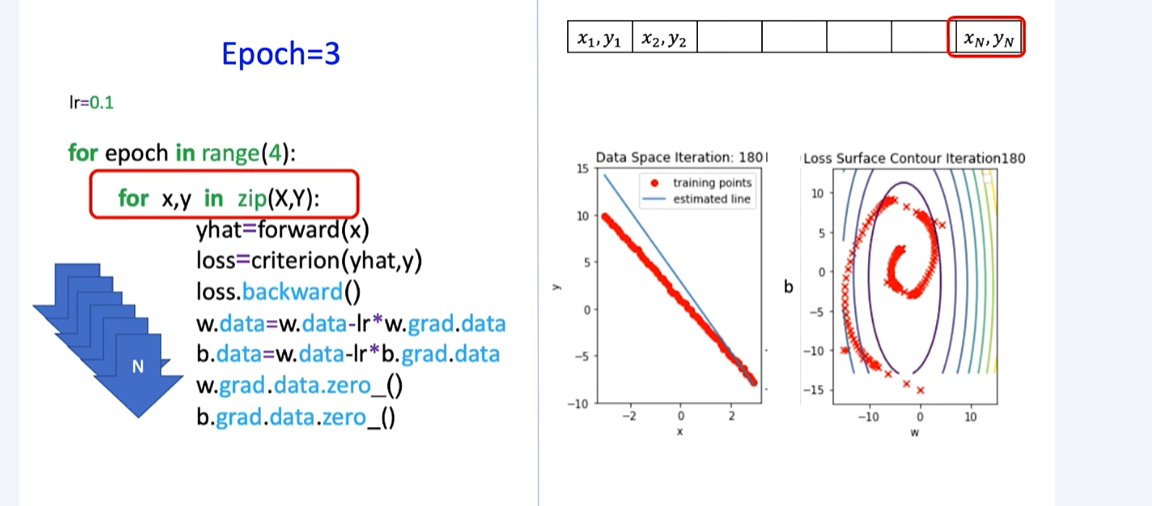

**Training validating test split with pytorch**

In [9]:
from torch.utils.data import Dataset, DataLoader
import torch

class Data(Dataset):
    def __init__(self, train=True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = 3 * self.x + 1  # fx = 3x + 1, this is the true value, + 1 is our bias
        self.y = self.f + 0.1 * torch.randn(self.x.shape[0], 1)  # Target values with added noise  # Target values with added noise
        self.len = self.x.shape[0]

        if train:  # This creates outliers in the training data
            self.y[0] = 0
            self.y[50:55] = 20

    # Correct indentation for __getitem__ and __len__ methods
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return self.len

train_data = Data(train=True)
val_data = Data(train=False)

In [8]:
import torch.nn as nn
class LR(nn.Module):
  def __init__(self,input_size,output_size):
    super(LR,self).__init__()
    self.linear = nn.Linear(input_size,output_size)
  def forward(self,x):
    out = self.linear(x) # we don't want to create a new instance of Linear every time we use forward()
    return out

criterion = nn.MSELoss()
trainloader = DataLoader(dataset=train_data,batch_size=1)

epochs = 10
learning_rates = [0.0001,0.001,0.01,0.1,1]
validation_error = torch.zeros(len(learning_rates))
test_error = torch.zeros(len(learning_rates))

MODELS = [] #store the training models for each learning rate and error



In [12]:
from torch import optim

# Loop over each learning rate in the list
for i, learning_rate in enumerate(learning_rates):

    # Create a new linear regression model (LR) with 1 input and 1 output
    model = LR(1,1)

    # Define the optimizer (Stochastic Gradient Descent) with the current learning rate
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    # Loop over the number of training epochs
    for epoch in range(epochs):

        # Loop over the batches in the training data (trainloader)
        for x, y in trainloader:

            # Forward pass: predict y (output) using the model with input x
            yhat = model(x)

            # Calculate the loss between the prediction (yhat) and the actual target (y)
            loss = criterion(yhat, y)

            # Reset the gradients from the previous step (clear out old gradients)
            optimizer.zero_grad()

            # Backward pass: calculate gradients (derivatives) of the loss with respect to the model parameters
            loss.backward()

            # Update the model parameters using the gradients
            optimizer.step()

    # After training, evaluate the model (no gradients needed for evaluation)
    with torch.no_grad():

        # Predict values for the training data
        yhat = model(train_data.x) # Predictions on training data

        # Calculate the loss on the training data (including noise)
        loss = criterion(yhat, train_data.y)

        # Store the training error for the current learning rate
        test_error[i] = loss.item() #return val

        # Save the model for the current learning rate
        MODELS.append(model)

        # Predict values for the validation data
        yhat = model(val_data.x) # Predictions on validation data

        # Calculate the loss on the validation data
        loss = criterion(yhat, val_data.y)

        # Store the validation error for the current learning rate
        validation_error[i] = loss.item() #return val

    # Save the trained model for this learning rate
    MODELS.append(model)


tensor([6.7909, 1.0430, 2.1923, 1.6176,    nan])
tensor([27.6732, 12.2450, 11.5693, 17.5821,     nan])


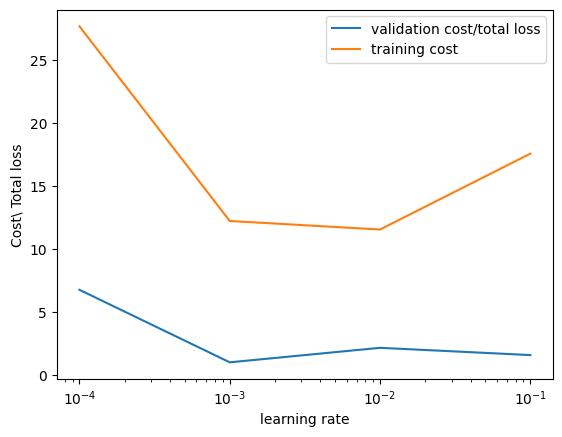

In [17]:
import numpy as np
import matplotlib.pyplot as plt
print(validation_error)
print(test_error)
plt.semilogx(np.array(learning_rates),validation_error.numpy(),label='validation cost/total loss')
plt.semilogx(np.array(learning_rates),test_error.numpy(),label='training cost')

plt.ylabel('Cost\ Total loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()